# Preprocessing of data

RHEOS offers several functions for sampling and filtering data; this page is intended to be a brief tutorial of their use. For detailed descriptions of functions and their optional arguments, see the [API](@ref) section. 

In [10]:
using RHEOS
using PyPlot

## Upsampling and downsampling

We generate a simple sinusoid with constant sampling rate (more details about data generation are discussed in the [Generating Data](@ref) section).

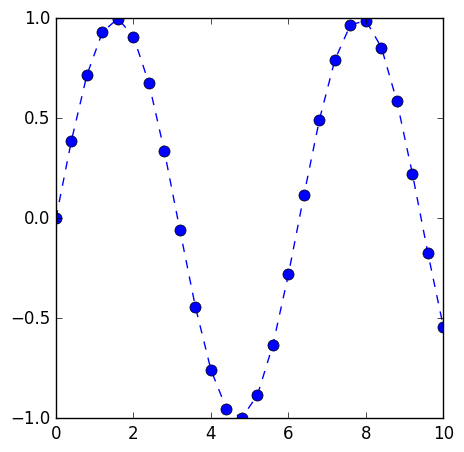

In [2]:
# Generate a sinusoidal data set
foo=timeline(t_start=0, t_end=10, step = 0.4)
foo=strainfunction(foo,t->sin(t))
fig, ax = subplots(1,1, figsize=(5,5))
ax.plot(foo.t, foo.ϵ, "--", marker = "o", markersize = 8, color = "blue");

To downsample the full data set by taking every nth sample, the function [`resample`](@ref) is defined with negative argument. Similarly, to increase the sample rate, the function [`resample`](@ref) is defined with positive argument.

**Note** that when 1 or -1 is defined, the function returns the original RheoTimeData, whilst 0 is not accepted as a valid argument. 

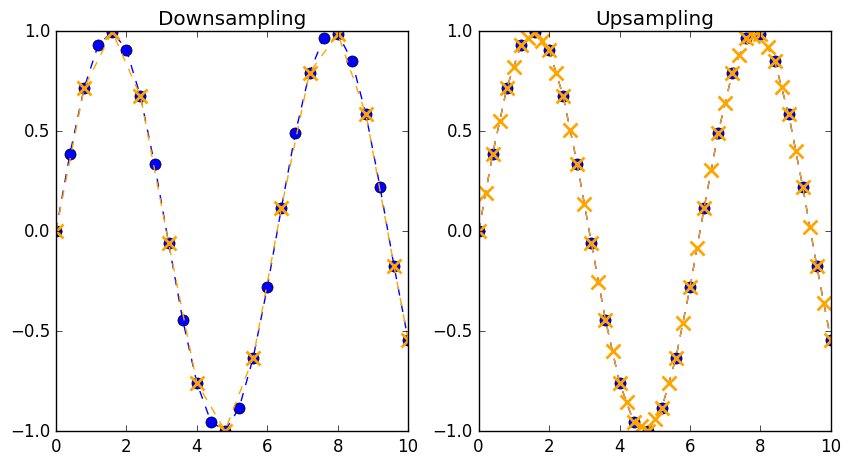

In [3]:
# Downsample
foo_dsamp = resample(foo, -2)
# Upsample
foo_usamp = resample(foo, 2)

# Plotting
fig, ax = subplots(1,2, figsize=(10,5))
ax[1].set_title("Downsampling")
ax[1].plot(foo.t, foo.ϵ, "--", marker = "o", markersize = 8, color = "blue");
ax[1].plot(foo_dsamp.t, foo_dsamp.ϵ, "--", marker = "x", markersize = 10, markeredgewidth=2, color = "orange");
ax[2].set_title("Upsampling")
ax[2].plot(foo.t, foo.ϵ, "--", marker = "o", markersize = 8, color = "blue");
ax[2].plot(foo_usamp.t, foo_usamp.ϵ, "--", marker = "x", markersize = 10, markeredgewidth=2, color = "orange");

RHEOS also allows us to define time regions with different sampling rate. This requires the definition of the time boundaries. 

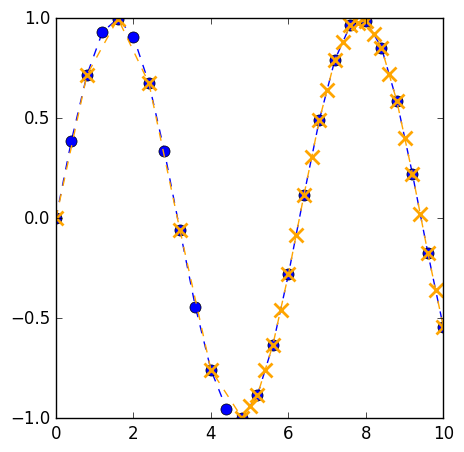

In [4]:
# Variable sampling: Downsampling region [0,5] and upsampling [5,10]
foo_samp = resample(foo, [-2,2], time_boundaries = [0.0, 5.0, 10.0])

# Plotting
fig, ax = subplots(1,1, figsize=(5,5))
ax.plot(foo.t, foo.ϵ, "--", marker = "o", markersize = 8, color = "blue");
ax.plot(foo_samp.t, foo_samp.ϵ, "--", marker = "x", markersize = 10, markeredgewidth=2, color = "orange");

## Cutting

RHEOS provides a dedicated function to remove the data outside a specified time interval.

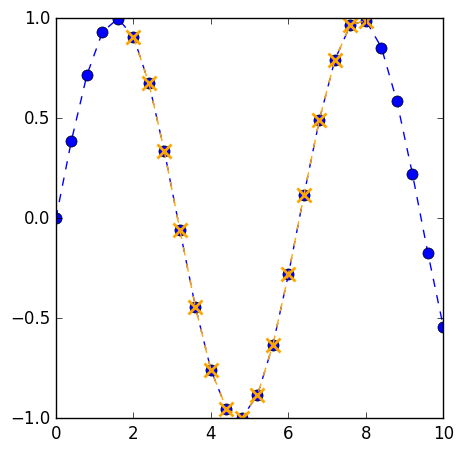

In [5]:
foo_cut = cutting(foo, 2.0, 8.0)

# Plotting
fig, ax = subplots(1,1, figsize=(5,5))
ax.plot(foo.t, foo.ϵ, "--", marker = "o", markersize = 8, color = "blue");
ax.plot(foo_cut.t, foo_cut.ϵ, "--", marker = "x", markersize = 10, markeredgewidth=2, color = "orange");

## Smoothing

Lastly, RHEOS provides a smoothing function, [`smooth`](@ref). The first argument is the data to smooth and the second argument is the (very) approximate time scale of smoothing. (It uses Gaussian smoothing and can be thought of as a low pass filter for information occuring on time scales shorter than the 2nd argument). The padding can be changed using a keyword argument if desired, see [API](@ref) and [ImageFiltering.jl Documentation](https://juliaimages.github.io/ImageFiltering.jl/stable/function_reference.html) for more details. 

In [ ]:
foo_s=timeline(t_start=0, t_end=10, step = 0.02);
foo_s=strainfunction(foo_s,t->3*sin(t));
noise=strainfunction(foo_s,t->rand());

foo_noisy = foo_s + noise
foo_smooth = smooth(foo_noisy, 1)

fig, ax = subplots(1,1, figsize=(5,5))
ax.plot(foo_noisy.t, foo_noisy.ϵ, color = "blue");
ax.plot(foo_smooth.t, foo_smooth.ϵ, color = "orange");